<b><font size="5"><p>AutoML - AutoGluon</p></b>
    
<b><font size="3">In January 2020, Amazon introduced AutoGluon, an open-source library that utilizes Automatic Machine Learning (AutoML) by deploying ML into ML itself. 
<p>AutoML is considered to be more accurate, time-saving, and easy-to-build than traditional ML methods</b>
    <p>https://autogluon.mxnet.io/index.html#

In [14]:
!python3 -m venv jatin_automl
!source jatin_automl/bin/activate

In [15]:
!pip install mxnet autogluon

In [16]:
import autogluon as ag
from autogluon import TabularPrediction as task

In [17]:
import pandas as pd

In [18]:
# Titanic Dataset 
df=pd.read_csv("train.csv",sep=",")

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
train_data = task.Dataset(df)
#train_data = train_data.head(10000) # subsample 500 data points for faster demo
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



<b><font size="5"><p>AutoGluon Hyper-Parameters Explanation</p></b>


<b><u>label</b></u> - Name of the column that contains the target variable to predict.

<b><u>output_directory</b></u> - Path to directory where models and intermediate outputs should be saved.

<b><u>problem_type</b></u> - Type of prediction problem, i.e. is this a binary/multiclass classification or regression problem (options: ‘binary’, ‘multiclass’, ‘regression’). If problem_type = None, the prediction problem type is inferred based on the label-values in provided dataset.

<b><u>eval_metric</b></u> - Metric by which predictions will be ultimately evaluated on test data. AutoGluon tunes factors such as hyperparameters, early-stopping, ensemble-weights, etc. in order to improve this metric on validation data.

<b><u>stopping_metric</b></u> - Metric which models use to early stop to avoid overfitting. stopping_metric is not used by weighted ensembles, instead weighted ensembles maximize eval_metric. Defaults to eval_metric value except when eval_metric=’roc_auc’, where it defaults to log_loss. Options are identical to options for eval_metric.

<b><u>hyperparameter_tune</b></u> - Whether to tune hyperparameters or just use fixed hyperparameter values for each model. Setting as True will increase fit() runtimes.

<b><u>feature_prune</b></u> - Whether or not to perform feature selection.

<b><u>auto_stack</b></u> - Whether to have AutoGluon automatically attempt to select optimal num_bagging_folds and stack_ensemble_levels based on data properties. Note: Overrides num_bagging_folds and stack_ensemble_levels values. Note: This can increase training time by up to 20x, but can produce much better results. Note: This can increase inference time by up to 20x.

<b><u>num_bagging_folds</b></u> - Number of folds used for bagging of models. When num_bagging_folds = k, training time is roughly increased by a factor of k (set = 0 to disable bagging). Disabled by default, but we recommend values between 5-10 to maximize predictive performance. Increasing num_bagging_folds will result in models with lower bias but that are more prone to overfitting. Values > 10 may produce diminishing returns, and can even harm overall results due to overfitting. To further improve predictions, avoid increasing num_bagging_folds much beyond 10 and instead increase num_bagging_sets.


<b><u>stack_ensemble_levels</b></u> - Number of stacking levels to use in stack ensemble. Roughly increases model training time by factor of stack_ensemble_levels+1 (set = 0 to disable stack ensembling). Disabled by default, but we recommend values between 1-3 to maximize predictive performance. To prevent overfitting, this argument is ignored unless you have also set num_bagging_folds >= 2.

<b><u>enable_fit_continuation</b></u> - Whether the predictor returned by this fit() call should be able to be further trained via another future fit() call. When enabled, the training and validation data are saved to disk for future reuse.

<b><u>time_limits</b></u> - Approximately how long fit() should run for (wallclock time in seconds). If not specified, fit() will run until all models have completed training, but will not repeatedly bag models unless num_bagging_sets is specified.

<b><u>visualizer</b></u> - How to visualize the neural network training progress during fit(). Options: [‘mxboard’, ‘tensorboard’, ‘none’].

<b><u>verbosity</b></u> - Verbosity levels range from 0 to 4 and control how much information is printed during fit(). Higher levels correspond to more detailed print statements (you can set verbosity = 0 to suppress warnings). If using logging, you can alternatively control amount of information printed via logger.setLevel(L), where L ranges from 0 to 50 (Note: higher values of L correspond to fewer print statements, opposite of verbosity levels)

<b><u>search_strategy</b></u> - Which hyperparameter search algorithm to use. Options include: ‘random’ (random search), ‘skopt’ (SKopt Bayesian optimization), ‘grid’ (grid search), ‘hyperband’ (Hyperband), ‘rl’ (reinforcement learner)
    

<font size=3><b> Autogluon Uses Python open source called Dask for Parallel Computing.

In [22]:

predictor = task.fit(train_data=train_data, 
                     label="Survived",
                     output_directory="AutogluonModels/",
                     problem_type ="binary",
                     eval_metric="accuracy",
                     stopping_metric= None,
                     hyperparameter_tune=False, 
                     feature_prune=False,
                     auto_stack = False, 
                     num_bagging_folds=0,
                     stack_ensemble_levels=0,
                     enable_fit_continuation=False,
                     time_limits=300,
                     verbosity=2,
                     search_strategy="grid"
                     
                    )

Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to AutogluonModels/
Train Data Rows:    891
Train Data Columns: 12
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Feature Generator processed 891 data points with 33 features
Original Features:
	int features: 4
	object features: 5
	float features: 2
Generated Features:
	int features: 22
All Features:
	int features: 26
	object features: 5
	float features: 2
	Data preprocessing and feature engineering runtime = 0.28s ...
AutoGluon will gauge predictive performance using evaluation metric: accuracy
To change this, specify the eval_metric argument of fit()
AutoGluon will early stop models using evaluation metric: accuracy
Fitting model: RandomForestClassifierGini ... Training model for up to 299.72s of the 299.72s of remaining time.
	0.8212	 = Validation accuracy score
	0.39s	 = Training runtime
	0.13s	 = Validation runtime
Fitting model: RandomForestClassifierEntr ... Trainin

<font size=3><b>Evaluation Summary of Multiple Model

In [23]:
print(predictor.fit_summary())

*** Summary of fit() ***
Number of models trained: 11
Types of models trained: 
{'TabularNeuralNetModel', 'CatboostModel', 'KNNModel', 'LGBModel', 'RFModel', 'WeightedEnsembleModel'}
Validation performance of individual models: {'RandomForestClassifierGini': 0.8212290502793296, 'RandomForestClassifierEntr': 0.8268156424581006, 'ExtraTreesClassifierGini': 0.8044692737430168, 'ExtraTreesClassifierEntr': 0.8100558659217877, 'KNeighborsClassifierUnif': 0.6089385474860335, 'KNeighborsClassifierDist': 0.6145251396648045, 'LightGBMClassifier': 0.8268156424581006, 'CatboostClassifier': 0.8156424581005587, 'NeuralNetClassifier': 0.8212290502793296, 'LightGBMClassifierCustom': 0.8268156424581006, 'weighted_ensemble_k0_l1': 0.8435754189944135}
Best model (based on validation performance): weighted_ensemble_k0_l1
Hyperparameter-tuning used: False
Bagging used: False 
Stack-ensembling used: False 
User-specified hyperparameters:
{'NN': {'num_epochs': 500}, 'GBM': {'num_boost_round': 10000}, 'CAT': 

<font size=3><b>Evaluation summary as graph

Populating the interactive namespace from numpy and matplotlib


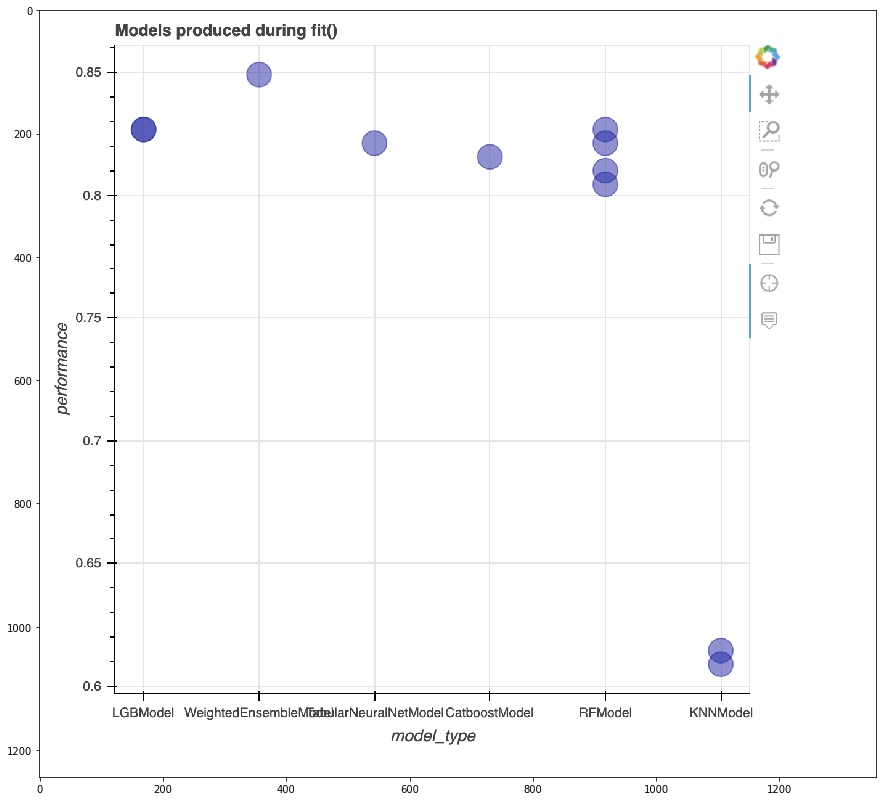

In [25]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize = (15,15))
img=mpimg.imread('models_evaluation_summary.png')
imgplot = plt.imshow(img)
plt.show()

<font size=3><b>AutoML Leadership Board

In [26]:
predictor.leaderboard()

                         model  score_val  fit_time  pred_time_val  stack_level
10     weighted_ensemble_k0_l1   0.843575  0.402966       0.000775            1
1   RandomForestClassifierEntr   0.826816  0.463260       0.116701            0
9     LightGBMClassifierCustom   0.826816  0.521937       0.014374            0
6           LightGBMClassifier   0.826816  0.286251       0.012463            0
0   RandomForestClassifierGini   0.821229  0.391091       0.131189            0
8          NeuralNetClassifier   0.821229  3.960192       0.211304            0
7           CatboostClassifier   0.815642  0.994012       0.011341            0
3     ExtraTreesClassifierEntr   0.810056  0.397253       0.119378            0
2     ExtraTreesClassifierGini   0.804469  0.395350       0.121077            0
5     KNeighborsClassifierDist   0.614525  0.009204       0.111308            0
4     KNeighborsClassifierUnif   0.608939  0.008834       0.111081            0


,model,score_val,fit_time,pred_time_val,stack_level
10,weighted_ensemble_k0_l1,0.843575,0.402966,0.000775,1
1,RandomForestClassifierEntr,0.826816,0.463260,0.116701,0
9,LightGBMClassifierCustom,0.826816,0.521937,0.014374,0
6,LightGBMClassifier,0.826816,0.286251,0.012463,0
0,RandomForestClassifierGini,0.821229,0.391091,0.131189,0
8,NeuralNetClassifier,0.821229,3.960192,0.211304,0
7,CatboostClassifier,0.815642,0.994012,0.011341,0
3,ExtraTreesClassifierEntr,0.810056,0.397253,0.119378,0
2,ExtraTreesClassifierGini,0.804469,0.395350,0.121077,0
5,KNeighborsClassifierDist,0.614525,0.009204,0.111308,0


<font size=3><b>AutoML Accuracy

In [27]:
predictor.model_performance

{'RandomForestClassifierGini': 0.8212290502793296,
 'RandomForestClassifierEntr': 0.8268156424581006,
 'ExtraTreesClassifierGini': 0.8044692737430168,
 'ExtraTreesClassifierEntr': 0.8100558659217877,
 'KNeighborsClassifierUnif': 0.6089385474860335,
 'KNeighborsClassifierDist': 0.6145251396648045,
 'LightGBMClassifier': 0.8268156424581006,
 'CatboostClassifier': 0.8156424581005587,
 'NeuralNetClassifier': 0.8212290502793296,
 'LightGBMClassifierCustom': 0.8268156424581006,
 'weighted_ensemble_k0_l1': 0.8435754189944135}

<b><font size="5"><p>THANK YOU </p></b>